<a href="https://colab.research.google.com/github/Keren-Neeq/DS4A-Team1/blob/main/notebooks/Team1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Remote Work Is Transforming America's Geographical Landscape
Team #1 | Ashek Ag Mohamed, Caprina Beal, Nzinga Eduardo Rodriguez, Keren Osabutey, Erika Smith

## Business Problem
### Overview

One of the most significant impacts of the Covid-19 pandemic may be a shift in how the workplace and workforce operate in the future. According to Forbes, approximately 5% of white-collar employees in the U.S. worked primarily from home before the outbreak. This figure skyrocketed to 71% during the pandemic. If given a choice to continue working from home post-pandemic, 54% of these workers indicated they would continue to do so, according to Pew Research Center. These figures will likely vary across occupations, industries, income, and education levels. As remote work becomes more popular, white-collar workers are likely to relocate from city centers to suburban areas, accelerating and changing geographic trends.

A report by the Economic Innovation Group (EIG) indicated that more than two-thirds of large urban counties saw their populations decline. Marking the first time in 50 years, counties with a population over 250,000  experienced negative growth. Although migration patterns had been in effect before Covid-19, the explosion of remote work during the pandemic, reductions in births, rising deaths, and delayed immigration accelerated the shift. EIG indicated other contributing factors, including high median home and apartment rental prices, low housing inventory, and increasing costs of consumer goods such as gas. 

Using data curated from Glassdoor, Zillow, the U.S. Department of Housing, the U.S. Bureau of Labor Statistics, and the U.S. Census Bureau, our analysis will answer the following:


1.   What are the top 10 cities in the U.S. with the most remote work opportunities?
2.   What are the top 10 states with the most remote work opportunities?
3.   Which jobs are likely to experience more significant increases in remote work?
4.   Which workers are most likely to have the option to work from home?
5.   How have city growth rates changed, and how is the population shifting?
6.   How have the average annual expenditures and population characteristics changed?
7.   How have the average home, and rent prices changed over time?
8.   What are the real estate implications of an increase in remote work?
9.   Is there a correlation between inflation, home prices, and rent prices?
10.   Has the inflation rate affected housing inventory? 
11. How has the cost of consumer goods changed?
12. What changes have occurred over time for consumer spending? 


## Import Libraries and Data

run me!!!!

In [ ]:
pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 30.1 MB/s 
     |████████████████████████████████| 1.6 MB 44.7 MB/s 


In [ ]:
import os
import re
import io
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px

from functools import reduce 
from google.colab import files
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output

sys.path.insert(0, "../utils")
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
sns.set(context='talk',style = 'whitegrid')

In [54]:
uploaded = files.upload()

Saving Metro_median_sale_price_uc_sfrcondo_month.csv to Metro_median_sale_price_uc_sfrcondo_month.csv


In [ ]:
# Department of Housing Avg. Rent Prices
hud_df = pd.read_csv(io.BytesIO(uploaded['clean_hud.csv']))

In [ ]:
# Zillow homes inventory
df_iv = pd.read_csv(io.BytesIO(uploaded['Metro_invt_fs_uc_sfrcondo_month.csv']))

In [55]:
# Zillow homes sale price
df_sp = pd.read_csv(io.BytesIO(uploaded['Metro_median_sale_price_uc_sfrcondo_month.csv']))

In [ ]:
remote_df = pd.read_csv(io.BytesIO(uploaded['remote_jobs_US.csv']))

## Preprocessing

### HUD Dataset

In [ ]:
hud_df.dtypes

fips              int64
state            object
area_name        object
county_name      object
fmr23_0           int64
fmr23_1           int64
fmr23_2           int64
fmr23_3           int64
fmr23_4           int64
fmr22_0           int64
fmr22_1           int64
fmr22_2           int64
fmr22_3           int64
fmr22_4           int64
fmr21_0           int64
fmr21_1           int64
fmr21_2           int64
fmr21_3           int64
fmr21_4           int64
fmr20_0           int64
fmr20_1           int64
fmr20_2           int64
fmr20_3           int64
fmr20_4           int64
fmr19_0           int64
fmr19_1           int64
fmr19_2           int64
fmr19_3           int64
fmr19_4           int64
pop2010           int64
pop2017           int64
pop2000           int64
census_region     int64
dtype: object

In [ ]:
hud_df.rename(columns = {'fmr23_0': 'studio_22', 'fmr23_1':'1bdrm_22',
       'fmr23_2':'2bdrm_22', 'fmr23_3':'3bdrm_22', 'fmr23_4':'4bdrm_22', 'fmr22_0':'studio_21',
       'fmr22_1':'1bdrm_21', 'fmr22_2':'2bdrm_21', 'fmr22_3':'3bdrm_21', 'fmr22_4':'4bdrm_21', 
       'fmr21_0':'studio_20', 'fmr21_1':'1bdrm_20', 'fmr21_2':'2bdrm_20', 'fmr21_3':'3bdrm_20',
       'fmr21_4':'4bdrm_20', 'fmr20_0':'studio_19', 'fmr20_1':'1bdrm_19', 'fmr20_2':'2bdrm_19', 
       'fmr20_3':'3bdrm_19', 'fmr20_4':'4bdrm_19','fmr19_0':'studio_18','fmr19_1':'1bdrm_18',
       'fmr19_2':'2bdrm_18', 'fmr19_3':'3bdrm_18', 'fmr19_4':'4bdrm_18'}, inplace=True)

In [ ]:
# View summary statistics for HUD dataset 
hud_df.describe()

,fips,studio_22,1bdrm_22,2bdrm_22,3bdrm_22,4bdrm_22,studio_21,1bdrm_21,2bdrm_21,3bdrm_21,...,4bdrm_19,studio_18,1bdrm_18,2bdrm_18,3bdrm_18,4bdrm_18,pop2010,pop2017,pop2000,census_region
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,10.000000
mean,2.488411e+09,1591.700000,1741.400000,2066.300000,2659.300000,3013.900000,1433.700000,1583.000000,1892.300000,2468.600000,...,2693.400000,1162.200000,1323.300000,1615.500000,2155.000000,2442.700000,2.684008e+06,2.815548e+06,2.521400e+06,3.000000
std,1.978748e+09,401.519351,479.107318,576.998565,676.257191,671.921201,431.407013,517.172011,630.384724,786.083287,...,894.696746,366.115282,434.194542,540.640823,692.011239,694.410069,2.918340e+06,2.982543e+06,2.871369e+06,1.247219
min,4.014000e+08,1158.000000,1245.000000,1406.000000,1758.000000,2172.000000,1005.000000,1091.000000,1253.000000,1587.000000,...,1822.000000,744.000000,868.000000,1073.000000,1455.000000,1738.000000,6.175940e+05,6.691600e+05,5.698910e+05,1.000000
25%,6.070000e+08,1259.000000,1389.500000,1654.500000,2162.500000,2491.000000,1082.250000,1177.750000,1367.750000,1835.500000,...,1969.000000,868.500000,987.000000,1214.000000,1596.750000,1907.750000,8.599928e+05,9.423450e+05,7.856198e+05,2.250000
50%,2.102853e+09,1439.000000,1607.000000,1977.500000,2692.000000,3038.500000,1246.000000,1420.000000,1793.500000,2442.500000,...,2505.500000,1044.500000,1235.000000,1553.000000,2044.000000,2309.000000,1.502330e+06,1.574638e+06,1.380347e+06,3.500000
75%,4.429400e+09,1976.000000,2097.750000,2393.750000,3046.750000,3413.500000,1770.750000,1924.250000,2266.000000,2913.000000,...,3062.500000,1410.500000,1560.000000,1882.000000,2396.500000,2623.500000,3.345650e+06,3.646155e+06,2.738370e+06,4.000000
max,5.303400e+09,2156.000000,2665.000000,3188.000000,3912.000000,4283.000000,2115.000000,2631.000000,3198.000000,4111.000000,...,4657.000000,1822.000000,2255.000000,2809.000000,3663.000000,3912.000000,9.818605e+06,1.010572e+07,9.519338e+06,4.000000


As the heatmap below shows there is:

1.   A strong positive correlation between the apartment types.
2.   A slight negative correlation between the apartment types and the populations.
3.  No correlation between fips and population.


In [ ]:
# Heatmap of correlations across features
colors = ['#ffe579', '#ea9675', '#72b6a1', '#e74f3e', '#add0d8', '#7e1e59']
fig = px.imshow(hud_df.corr(), color_continuous_scale=colors)

fig.update_layout(
    title_text='Correlation Matrix of HUD Dataset', 
    title_x=0.5, 
    width=800, 
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
    )

fig.show()

In [ ]:
# View information about the data including non-null counts
hud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fips           10 non-null     int64 
 1   state          10 non-null     object
 2   area_name      10 non-null     object
 3   county_name    10 non-null     object
 4   studio_22      10 non-null     int64 
 5   1bdrm_22       10 non-null     int64 
 6   2bdrm_22       10 non-null     int64 
 7   3bdrm_22       10 non-null     int64 
 8   4bdrm_22       10 non-null     int64 
 9   studio_21      10 non-null     int64 
 10  1bdrm_21       10 non-null     int64 
 11  2bdrm_21       10 non-null     int64 
 12  3bdrm_21       10 non-null     int64 
 13  4bdrm_21       10 non-null     int64 
 14  studio_20      10 non-null     int64 
 15  1bdrm_20       10 non-null     int64 
 16  2bdrm_20       10 non-null     int64 
 17  3bdrm_20       10 non-null     int64 
 18  4bdrm_20       10 non-null     in

In [ ]:
# Summary of the number of nulls values
hud_df.isna().sum()

fips             0
state            0
area_name        0
county_name      0
studio_22        0
1bdrm_22         0
2bdrm_22         0
3bdrm_22         0
4bdrm_22         0
studio_21        0
1bdrm_21         0
2bdrm_21         0
3bdrm_21         0
4bdrm_21         0
studio_20        0
1bdrm_20         0
2bdrm_20         0
3bdrm_20         0
4bdrm_20         0
studio_19        0
1bdrm_19         0
2bdrm_19         0
3bdrm_19         0
4bdrm_19         0
studio_18        0
1bdrm_18         0
2bdrm_18         0
3bdrm_18         0
4bdrm_18         0
pop2010          0
pop2017          0
pop2000          0
census_region    0
dtype: int64

From the matrix plot below, the solid gray bars indicate that there are no missing values across all features. The line on the right indicates where the missing values are distributed, the line would would move towards the left in areas with missing values, the fact that the line is solid also confirms that there are no missing values. 

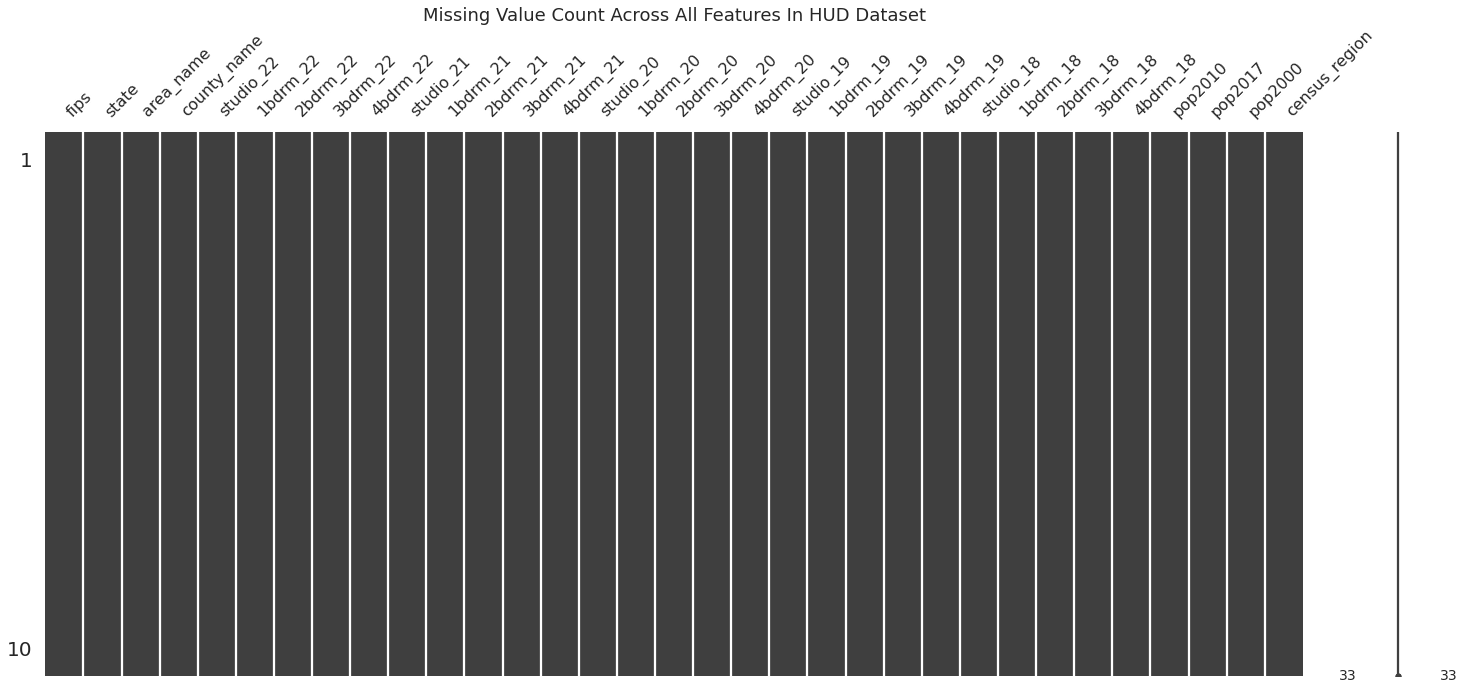

In [ ]:
# Gives a matrix plot of the missing values
msno.matrix(hud_df)
plt.title('Missing Value Count Across All Features In HUD Dataset')
plt.show()

In [ ]:
# Removing county_name, census_region, population for 2000, 2010, & 2017

hud_df = hud_df.drop(['fips','county_name', 'pop2000','pop2010','pop2017','census_region'], axis=1)

In [ ]:
# Reorder the columns from 2018 to 2022 to get the correct calculation for % change. Original file has the columns ordered from 2022 to 2018

hud_df = hud_df[['state', 'area_name','studio_18','studio_19','studio_20','studio_21','studio_22','1bdrm_18','1bdrm_19',
      '1bdrm_20','1bdrm_21','1bdrm_22','2bdrm_18','2bdrm_19','2bdrm_20','2bdrm_21','2bdrm_22','3bdrm_18','3bdrm_19',
      '3bdrm_20','3bdrm_21','3bdrm_22','4bdrm_18','4bdrm_19','4bdrm_20','4bdrm_21','4bdrm_22']]

In [ ]:
hud_df = hud_df.set_index(['area_name', 'state'])

In [51]:
hud_df

,area_name,state,studio_19,studio_20,studio_21,studio_22,1bdrm_19,1bdrm_20,1bdrm_21,1bdrm_22,...,2bdrm_21,2bdrm_22,3bdrm_19,3bdrm_20,3bdrm_21,3bdrm_22,4bdrm_19,4bdrm_20,4bdrm_21,4bdrm_22
0,Phoenix,AZ,847,933,1005,1344,958,1032,1091,1467,...,1311,1740,1676,1765,1825,2386,1916,2010,2078,2716
1,Los_Angeles,CA,1279,1369,1384,1534,1517,1605,1604,1747,...,2044,2222,2614,2735,2693,2888,2857,2982,2933,3170
2,Sacramento,CA,952,1060,1108,1277,1072,1188,1228,1400,...,1543,1756,1946,2140,2192,2496,2368,2588,2625,2907
3,San_Francisco,CA,2197,2350,2115,2156,2720,2923,2631,2665,...,3198,3188,4365,4567,4111,3912,4657,4970,4473,4283
4,Chicago,IL,956,1012,1059,1158,1076,1122,1161,1255,...,1340,1440,1585,1649,1697,1827,1888,1969,2018,2172
5,Boston,MA,1715,1742,1803,2025,1900,1924,1986,2198,...,2399,2635,2880,2906,2966,3207,3131,3168,3253,3540
6,New_York,NY,1665,1760,2018,2123,1714,1801,2054,2170,...,2340,2451,2472,2598,2952,3078,2643,2784,3173,3316
7,Nashville,TN,898,998,1079,1218,957,1031,1100,1245,...,1253,1406,1484,1539,1587,1758,1822,1930,1975,2173
8,Austin,TX,988,1059,1092,1253,1134,1212,1236,1386,...,1451,1626,1763,1848,1867,2088,2128,2207,2194,2416
9,Seattle,WA,1627,1523,1674,1829,1741,1599,1739,1881,...,2044,2199,2993,2694,2796,2953,3524,3172,3285,3446


In [ ]:
# Split dataset by apartment unit

studio_df = hud_df[['studio_18', 'studio_19', 'studio_20', 'studio_21', 'studio_22']]
onebdrm_df = hud_df[['1bdrm_18', '1bdrm_19', '1bdrm_20', '1bdrm_21', '1bdrm_22']]
twobdrm_df = hud_df[['2bdrm_18','2bdrm_19','2bdrm_20','2bdrm_21','2bdrm_22']]
threebdrm_df = hud_df[['3bdrm_18','3bdrm_19','3bdrm_20','3bdrm_21','3bdrm_22']]
fourbdrm_df = hud_df[['4bdrm_18','4bdrm_19','4bdrm_20','4bdrm_21','4bdrm_22']]

#### Calculate Average Apartment Rent Price Differences and Yearly Growth Rates For Years 2018-2022

In [ ]:
def calc_growth_diff(df_list, method='diff', periods=1, axis='columns'):
  """
  Computes the percentage change or difference of a DataFrame element compared 
  with another element in the DataFrame (default is element in previous column)
  for multiple DataFrames.

    Parameters:
          df_list : list
              List of DataFrames.

          method : {'diff', 'pct'}, default 'diff'

          periods : int, default 1
              Periods to shift for calculating difference or percent change, 
              accepts negative values.
          
          axis : {0 or ‘index’, 1 or ‘columns’}, default 'columns'
              Take difference or percent change over rows (0) or columns (1).
              
    Returns:
          new_dfs : list 
              A list of DataFrames with newly calculated values.
  """

  if method == 'diff':

    if axis in [1, 'columns']:

      if periods == 1:
        new_dfs = [df.diff(axis="columns") for df in df_list]
        [df.reset_index(inplace=True) for df in new_dfs]
      else:
        new_dfs = [df.diff(axis="columns", periods=periods) for df in df_list]
        [df.reset_index(inplace=True) for df in new_dfs]

    elif axis in [0, 'index']:

      if periods == 1:
        new_dfs = [df.diff() for df in df_list]
        [df.reset_index(inplace=True) for df in new_dfs]
      else:
        new_dfs = [df.diff(periods=periods) for df in df_list]
        [df.reset_index(inplace=True) for df in new_dfs]


  elif method == 'pct':

    if axis in [1, 'columns']:

      if periods == 1:
        new_dfs = [df.pct_change(axis="columns") for df in df_list]
        [df.reset_index(inplace=True) for df in new_dfs]
      else:
        new_dfs = [df.pct_change(axis="columns", periods=periods) for df in df_list]
        [df.reset_index(inplace=True) for df in new_dfs]

    elif axis in [0, 'index']:

      if periods == 1:
        new_dfs = [df.pct_change() for df in df_list]
        [df.reset_index(inplace=True) for df in new_dfs]
      else:
        new_dfs = [df.pct_change(periods=periods) for df in df_list]
        [df.reset_index(inplace=True) for df in new_dfs]
      
  return new_dfs

In [ ]:
def combine_data(df_list, on, how='inner'):
  """
  Combines multiple DataFrames into one. 

    Parameters:
          df_list : list
              A list of two or more DataFrames.

          on : label or list
              Column name(s) to join on. These must be found in both DataFrames.
          
          how : {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’
              Type of merge to be performed.
              • left: use only keys from left frame, similar to a SQL left outer join.
              • right: use only keys from right frame, similar to a SQL right outer join.
              • outer: use union of keys from both frames, similar to a SQL full outer join.
              • inner: use intersection of keys from both frames, similar to a SQL inner join.
              • cross: creates the cartesian product from both frames.
              
    Returns:
          combined_df (DataFrame): A Dataframe of the merged DataFrames in 'df_list'
  """

  combined_df = reduce(lambda left, right:
                       pd.merge(left, right, on=on, how=how),
                       df_list)
  
  combined_df.dropna(axis=1, how='all', inplace=True)
  
  return combined_df

In [ ]:
# Create list dfs for easier preprocessing

df_list = [studio_df, onebdrm_df, twobdrm_df, threebdrm_df, fourbdrm_df]

In [ ]:
# Calculate apartment rent price differences over a one year period 
price_dfs = calc_growth_diff(df_list)

# Calculate apartment rent price differences over a two year period 
price2_dfs = calc_growth_diff(df_list, periods=2)

# Calculate apartment rent price differences over a three year period 
price3_dfs = calc_growth_diff(df_list, periods=3)

# Calculate apartment rent price differences over a four year period 
price4_dfs = calc_growth_diff(df_list, periods=4)

In [ ]:
# Calculate growth over one year
percent_dfs = calc_growth_diff(df_list, method='pct')

# Calculate growth over two years
percent2_dfs = calc_growth_diff(df_list, method='pct', periods=2)

# Calculate growth over three years
percent3_dfs = calc_growth_diff(df_list, method='pct', periods=3)

# Calculate growth over four years
percent4_dfs = calc_growth_diff(df_list, method='pct', periods=4)

In [ ]:
# Combine data by price differences

price_df = combine_data(price_dfs, on=['area_name', 'state'])
price2_df = combine_data(price2_dfs, on=['area_name', 'state'])
price3_df = combine_data(price3_dfs, on=['area_name', 'state'])
price4_df = combine_data(price4_dfs, on=['area_name', 'state'])

In [ ]:
# Combine data by percentage differences

percent_df = combine_data(percent_dfs, on=['area_name', 'state'])
percent2_df = combine_data(percent2_dfs, on=['area_name', 'state'])
percent3_df = combine_data(percent3_dfs, on=['area_name', 'state'])
percent4_df = combine_data(percent4_dfs, on=['area_name', 'state'])

In [ ]:
hud_df.reset_index(inplace=True)
hud_df.drop(['studio_18','1bdrm_18','2bdrm_18','3bdrm_18','4bdrm_18'], axis=1, inplace=True)

In [ ]:
# Reshape data
price_cols = price_df.columns[2:].tolist()
percent_cols = percent_df.columns[2:].tolist()
col_vals = hud_df.columns[2:].tolist()

rentdf = pd.melt(hud_df,
                 id_vars=['area_name', 'state'],
                 var_name='unit',
                 value_vars=col_vals,
                 value_name='Avg Rent')

pricedf = pd.melt(price_df,
                  id_vars=['area_name', 'state'],
                  var_name='unit',
                  value_vars=price_cols,
                  value_name = 'Change')


percentdf = pd.melt(percent_df,
                    id_vars=['area_name', 'state'],
                    var_name='unit',
                    value_vars=percent_cols,
                    value_name='YoY')

In [90]:
hud_df.head()

,area_name,state,studio_19,studio_20,studio_21,studio_22,1bdrm_19,1bdrm_20,1bdrm_21,1bdrm_22,...,2bdrm_21,2bdrm_22,3bdrm_19,3bdrm_20,3bdrm_21,3bdrm_22,4bdrm_19,4bdrm_20,4bdrm_21,4bdrm_22
0,Phoenix,AZ,847,933,1005,1344,958,1032,1091,1467,...,1311,1740,1676,1765,1825,2386,1916,2010,2078,2716
1,Los_Angeles,CA,1279,1369,1384,1534,1517,1605,1604,1747,...,2044,2222,2614,2735,2693,2888,2857,2982,2933,3170
2,Sacramento,CA,952,1060,1108,1277,1072,1188,1228,1400,...,1543,1756,1946,2140,2192,2496,2368,2588,2625,2907
3,San_Francisco,CA,2197,2350,2115,2156,2720,2923,2631,2665,...,3198,3188,4365,4567,4111,3912,4657,4970,4473,4283
4,Chicago,IL,956,1012,1059,1158,1076,1122,1161,1255,...,1340,1440,1585,1649,1697,1827,1888,1969,2018,2172


In [91]:
percentdf.head()

,area_name,state,unit,YoY
0,Phoenix,AZ,studio_19,0.138441
1,Los_Angeles,CA,studio_19,0.104491
2,Sacramento,CA,studio_19,0.116061
3,San_Francisco,CA,studio_19,0.205818
4,Chicago,IL,studio_19,0.044809


In [ ]:
# Combine percentdf and pricedf

yoydf = pd.merge(pricedf, percentdf, on=['area_name', 'state', 'unit'])
yoydf = pd.merge(rentdf, yoydf, on=['area_name', 'state', 'unit'])

In [ ]:
# Reshape data
price2_cols = price2_df.columns[2:].tolist()
percent2_cols = percent2_df.columns[2:].tolist()

price2df = pd.melt(price2_df,
                   id_vars=['area_name', 'state'],
                   var_name='unit',
                   value_vars=price2_cols,
                   value_name = '2Y Change')


percent2df = pd.melt(percent2_df,
                     id_vars=['area_name', 'state'],
                     var_name='unit',
                     value_vars=percent2_cols,
                     value_name='Yo2Y')

yo2y_df = pd.merge(price2df, percent2df, on = ['area_name', 'state', 'unit'])
yearly_df = pd.merge(yoydf, yo2y_df, on = ['area_name', 'state', 'unit'], how='left')

In [ ]:
# Reshape data
price3_cols = price3_df.columns[2:].tolist()
percent3_cols = percent3_df.columns[2:].tolist()

price3df = pd.melt(price3_df,
                   id_vars=['area_name', 'state'],
                   var_name='unit',
                   value_vars=price3_cols,
                   value_name = '3Y Change')


percent3df = pd.melt(percent3_df,
                     id_vars=['area_name', 'state'],
                     var_name='unit',
                     value_vars=percent3_cols,
                     value_name='Yo3Y')

yo3y_df = pd.merge(price3df, percent3df, on=['area_name', 'state', 'unit'])
yearly_df = pd.merge(yearly_df, yo3y_df, on=['area_name', 'state', 'unit'], how='left')

In [ ]:
# Reshape data
price4_cols = price4_df.columns[2:].tolist()
percent4_cols = percent4_df.columns[2:].tolist()

price4df = pd.melt(price4_df,
                   id_vars=['area_name', 'state'],
                   var_name='unit',
                   value_vars=price4_cols,
                   value_name = '4Y Change')


percent4df = pd.melt(percent4_df,
                     id_vars=['area_name', 'state'],
                     var_name='unit',
                     value_vars=percent4_cols,
                     value_name='Yo4Y')

yo4y_df = pd.merge(price4df, percent4df, on=['area_name', 'state', 'unit'])
yearly_df = pd.merge(yearly_df, yo4y_df, on=['area_name', 'state', 'unit'], how='left')

In [ ]:
yearly_df.head()

,area_name,state,unit,Avg Rent,Change,YoY,2Y Change,Yo2Y,3Y Change,Yo3Y,4Y Change,Yo4Y
0,Phoenix,AZ,studio_19,847,103,0.138441,NaN,NaN,NaN,NaN,NaN,NaN
1,Los_Angeles,CA,studio_19,1279,121,0.104491,NaN,NaN,NaN,NaN,NaN,NaN
2,Sacramento,CA,studio_19,952,99,0.116061,NaN,NaN,NaN,NaN,NaN,NaN
3,San_Francisco,CA,studio_19,2197,375,0.205818,NaN,NaN,NaN,NaN,NaN,NaN
4,Chicago,IL,studio_19,956,41,0.044809,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# clean yearly_df
yearly_df[['Bedrooms','Year']] = yearly_df['unit'].str.split('_', expand=True)
yearly_df['area_name'] = yearly_df['area_name'].str.replace("_"," ")
yearly_df['Bedrooms'] = yearly_df['Bedrooms'].str.split('bdrm', expand=True)[0]

yearly_df.rename(columns={'area_name': 'City',
                            'state':'State'}, 
                 inplace=True)

yearly_df.drop(columns='unit', inplace=True)
yearly_df.head()

,City,State,Avg Rent,Change,YoY,2Y Change,Yo2Y,3Y Change,Yo3Y,4Y Change,Yo4Y,Bedrooms,Year
0,Phoenix,AZ,847,103,0.138441,NaN,NaN,NaN,NaN,NaN,NaN,studio,19
1,Los Angeles,CA,1279,121,0.104491,NaN,NaN,NaN,NaN,NaN,NaN,studio,19
2,Sacramento,CA,952,99,0.116061,NaN,NaN,NaN,NaN,NaN,NaN,studio,19
3,San Francisco,CA,2197,375,0.205818,NaN,NaN,NaN,NaN,NaN,NaN,studio,19
4,Chicago,IL,956,41,0.044809,NaN,NaN,NaN,NaN,NaN,NaN,studio,19


In [ ]:
years = {'19': '2019', 
         '20':'2020', 
         '21':'2021', 
         '22':'2022'
         }

yearly_df['Year'] = yearly_df['Year'].map(years)

In [ ]:
yearly_df = yearly_df[['City', 'State', 'Bedrooms','Year',
                       'Avg Rent', 'Change', 'YoY', '2Y Change', 
                       'Yo2Y', '3Y Change', 'Yo3Y', '4Y Change', 'Yo4Y']]
yearly_df.head()

,City,State,Bedrooms,Year,Avg Rent,Change,YoY,2Y Change,Yo2Y,3Y Change,Yo3Y,4Y Change,Yo4Y
0,Phoenix,AZ,studio,2019,847,103,0.138441,NaN,NaN,NaN,NaN,NaN,NaN
1,Los Angeles,CA,studio,2019,1279,121,0.104491,NaN,NaN,NaN,NaN,NaN,NaN
2,Sacramento,CA,studio,2019,952,99,0.116061,NaN,NaN,NaN,NaN,NaN,NaN
3,San Francisco,CA,studio,2019,2197,375,0.205818,NaN,NaN,NaN,NaN,NaN,NaN
4,Chicago,IL,studio,2019,956,41,0.044809,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Round values to percentages and round to 2 decimal places

yearly_df['YoY'] = np.around(yearly_df['YoY'] * 100, decimals=2)
yearly_df['Yo2Y'] = np.around(yearly_df['Yo2Y'] * 100, decimals=2)
yearly_df['Yo3Y'] = np.around(yearly_df['Yo3Y'] * 100, decimals=2)
yearly_df['Yo4Y'] = np.around(yearly_df['Yo4Y'] * 100, decimals=2)

In [ ]:
# Convert numbers from float to int
yearly_df['2Y Change'] = yearly_df['2Y Change'].astype('Int64')
yearly_df['3Y Change'] = yearly_df['3Y Change'].astype('Int64')
yearly_df['4Y Change'] = yearly_df['4Y Change'].astype('Int64')

In [ ]:
yearly_df

,City,State,Bedrooms,Year,Avg Rent,Change,YoY,2Y Change,Yo2Y,3Y Change,Yo3Y,4Y Change,Yo4Y
0,Phoenix,AZ,studio,2019,847,103,13.84,<NA>,NaN,<NA>,NaN,<NA>,NaN
1,Los Angeles,CA,studio,2019,1279,121,10.45,<NA>,NaN,<NA>,NaN,<NA>,NaN
2,Sacramento,CA,studio,2019,952,99,11.61,<NA>,NaN,<NA>,NaN,<NA>,NaN
3,San Francisco,CA,studio,2019,2197,375,20.58,<NA>,NaN,<NA>,NaN,<NA>,NaN
4,Chicago,IL,studio,2019,956,41,4.48,<NA>,NaN,<NA>,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Boston,MA,4,2022,3540,287,8.82,372,11.74,409,13.06,969,37.69
196,New York,NY,4,2022,3316,143,4.51,532,19.11,673,25.46,841,33.98
197,Nashville,TN,4,2022,2173,198,10.03,243,12.59,351,19.26,435,25.03
198,Austin,TX,4,2022,2416,222,10.12,209,9.47,288,13.53,317,15.10


In [52]:
# Saves file to Colab's 'Files' folder, gets deleted after session terminates
yearly_df.to_csv('hud_yearly.csv', index=False)

In [53]:
# Save file to computer
files.download('hud_yearly.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Remote Jobs Dataset

In [ ]:
remote_df.sample(5, random_state=1)

,company_name,job_title,job_senority,degree,job_desc,city,state,salary_range,avg_salary,salary_lower,salary_upper,size,industry,sector,job_function,revenue,num_listings
304,Advisor Group,Communications Manager,NaN,NaN,corporate communications opportunity in financ...,New York,NY,62000 - 89000,74571.0,62000,89000,1001 - 5000,Investment & Asset Management,Financial Services,Media & Communications,NaN,258
965,Blue Cross Blue Shield of Arizona,Senior Data Analyst,NaN,NaN,"awarded the best place to work 2021, blue cros...",Phoenix,AZ,65000 - 91000,76782.0,65000,91000,1001 - 5000,Insurance Carriers,Insurance,Research & Science,NaN,791
726,Path Mental Health,Licensed Clinical Social Worker,NaN,NaN,about path\npath is a national behavioral heal...,Chico,CA,3000 - 9000,5625.0,3000,9000,1001 - 5000,Health Care Services & Hospitals,Healthcare,Healthcare,NaN,571
931,McAfee,"Senior Legal Counsel, Products and Brand",NaN,NaN,"job title:\nsenior legal counsel, products and...",San Jose,CA,-111 - -111,NaN,-111,-111,1001 - 5000,Computer Hardware Development,Information Technology,Legal,NaN,160
1102,La Frontera Arizona,SEABHS - Clinical Operations Support Staff,NaN,NaN,summary\nemployee will screen all clientele fo...,Benson,AZ,-111 - -111,NaN,-111,-111,1001 - 5000,Healthcare,NaN,Operations,NaN,610


In [ ]:
remote_df.shape

(1118, 17)

In [ ]:
remote_df.dtypes

company_name     object
job_title        object
job_senority    float64
degree           object
job_desc         object
city             object
state            object
salary_range     object
avg_salary      float64
salary_lower      int64
salary_upper      int64
size             object
industry         object
sector           object
job_function     object
revenue          object
num_listings      int64
dtype: object

In [ ]:
# Confirm the number of missing values in each column.
remote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  1109 non-null   object 
 1   job_title     1115 non-null   object 
 2   job_senority  0 non-null      float64
 3   degree        69 non-null     object 
 4   job_desc      1118 non-null   object 
 5   city          977 non-null    object 
 6   state         1118 non-null   object 
 7   salary_range  1118 non-null   object 
 8   avg_salary    935 non-null    float64
 9   salary_lower  1118 non-null   int64  
 10  salary_upper  1118 non-null   int64  
 11  size          1116 non-null   object 
 12  industry      1113 non-null   object 
 13  sector        1023 non-null   object 
 14  job_function  1118 non-null   object 
 15  revenue       69 non-null     object 
 16  num_listings  1118 non-null   int64  
dtypes: float64(2), int64(3), object(12)
memory usage: 148.6+ KB


We plot a heatmap of the missing values give us insight as to how missing values across different features correlate. Nin

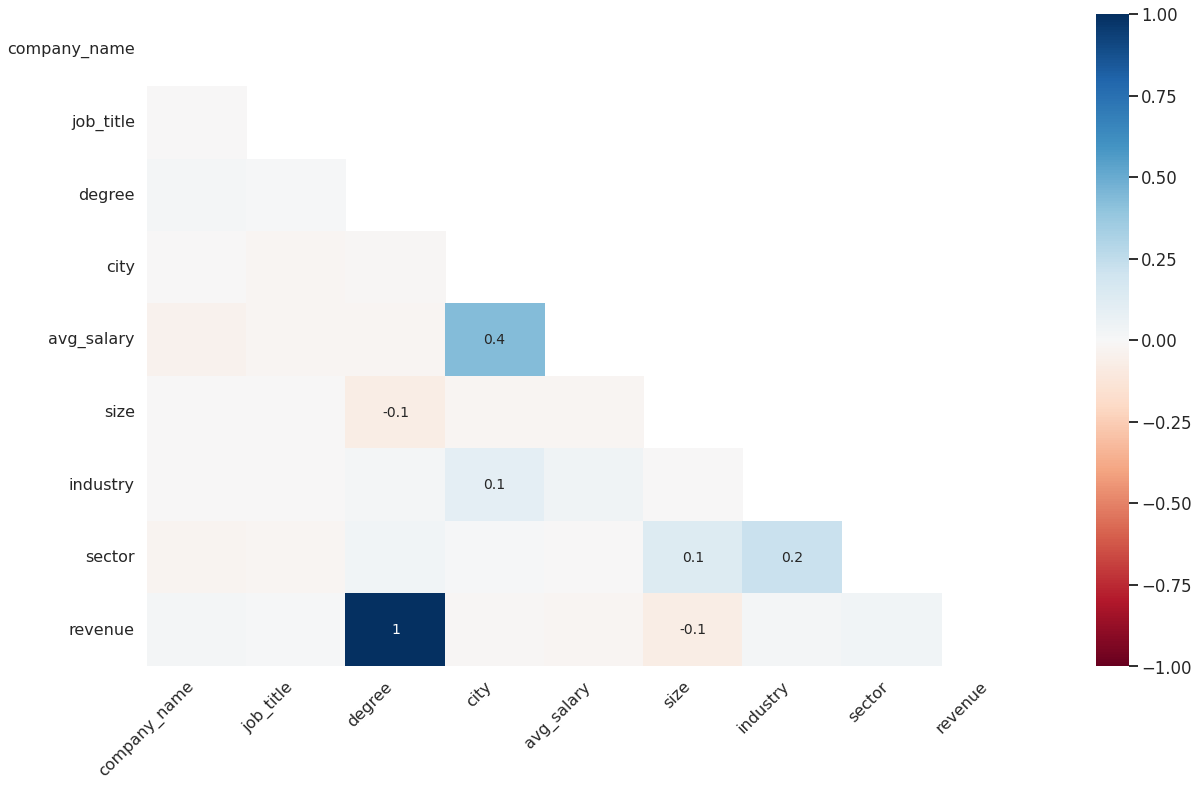

In [ ]:
# Gives a heatmap of how missing values are related
msno.heatmap(remote_df)
plt.show()

In [ ]:
remote_df.describe()

,job_senority,avg_salary,salary_lower,salary_upper,num_listings
count,0.0,935.000000,1118.000000,1118.000000,1118.000000
mean,NaN,69928.110374,40170.216458,34444.397138,581.642218
std,NaN,38524.105641,28141.258864,35739.879796,519.994808
min,NaN,2700.000000,-111.000000,-111.000000,28.000000
25%,NaN,45476.500000,10450.000000,-111.000000,196.000000
50%,NaN,61465.000000,42557.000000,35360.000000,454.000000
75%,NaN,85353.500000,58810.000000,67000.000000,791.000000
max,NaN,500000.000000,208000.000000,149760.000000,2595.000000


As the below boxplot charts indicate, the median salary is approximately $61K, the median lower range is $42K, and the median upper range is $35K, which indicates that there are likely missing or incorrect values

In [ ]:
# Plot box plot of avg_salary
fig = px.box(remote_df, y='avg_salary')
fig.show()

In [ ]:
# Plot box plot of salary_lower
fig = px.box(remote_df, y='salary_lower')
fig.show()

In [ ]:
# Plot box plot of salary_upper
fig = px.box(remote_df, y='salary_upper')
fig.show()

### Homes Sale

In [57]:
target_cities = ['New York, NY', 'Chicago, IL', 'Boston, MA', 'Seattle, WA', 'San Francisco, CA', 'Sacramento, CA', 'Austin, TX', 'Los Angeles, CA', 'Nashville, TN', 'Phoenix, AZ']

In [58]:
sale_price = df_sp[df_sp.RegionName.isin(target_cities)]

In [59]:
sale_price = sale_price[['RegionName','2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', 
    '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
           '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', 
    '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
            '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', 
    '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'
           ]]

In [60]:
sale_price

,RegionName,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
1,"New York, NY",400000.0,400000.0,393800.0,395000.0,405000.0,425000.0,435000.0,425000.0,420000.0,...,470000.0,485000.0,500000.0,519700.0,530000.0,530000.0,530000.0,515000.0,512000.0,512500.0
2,"Los Angeles, CA",600000.0,615000.0,629000.0,640000.0,640000.0,648000.0,662000.0,643000.0,645000.0,...,772000.0,800000.0,817500.0,825000.0,820000.0,825000.0,825000.0,825000.0,830000.0,843250.0
3,"Chicago, IL",216500.0,220000.0,233000.0,238000.0,245000.0,250000.0,249000.0,240000.0,231418.0,...,261000.0,277000.0,289000.0,290500.0,290000.0,289000.0,280000.0,278000.0,277000.0,273000.0
10,"Phoenix, AZ",265000.0,266900.0,270000.0,274000.0,280500.0,281291.0,282000.0,284000.0,285000.0,...,365000.0,377500.0,395000.0,400825.0,410000.0,415000.0,420000.0,426484.0,429000.0,430000.0
11,"Boston, MA",426000.0,419450.0,430000.0,439900.0,469900.0,484917.0,475000.0,470000.0,445000.0,...,530000.0,558000.0,578000.0,606820.0,590000.0,585000.0,554000.0,550000.0,570000.0,561750.0
12,"San Francisco, CA",760000.0,810000.0,850000.0,893500.0,900000.0,900000.0,857250.0,835000.0,828000.0,...,1010000.0,1121000.0,1145000.0,1135000.0,1100000.0,1080000.0,1050000.0,1075000.0,1065000.0,985000.0
15,"Seattle, WA",415000.0,440000.0,455200.0,465000.0,485000.0,475000.0,469000.0,469000.0,460000.0,...,600000.0,620000.0,650000.0,650000.0,650000.0,640000.0,625000.0,635000.0,630000.0,625000.0
26,"Sacramento, CA",374500.0,385000.0,394750.0,410000.0,415000.0,416000.0,415000.0,415000.0,407000.0,...,505000.0,510000.0,536000.0,550000.0,545000.0,540500.0,540250.0,535000.0,540000.0,535000.0
29,"Austin, TX",296500.0,295000.0,315000.0,325000.0,336000.0,340000.0,325000.0,325000.0,318000.0,...,435000.0,480000.0,475000.0,495000.0,492000.0,479150.0,462620.0,456000.0,478500.0,475990.0
36,"Nashville, TN",256750.0,255936.0,265000.0,272900.0,285000.0,295000.0,288000.0,290000.0,280000.0,...,325000.0,337900.0,355000.0,371250.0,380000.0,380000.0,379000.0,399900.0,389900.0,399000.0


### Homes Inventory

In [ ]:
inventory = df_iv[df_iv.RegionName.isin(target_cities)]

In [ ]:
inventory = inventory[['RegionName','2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', 
    '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
           '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', 
    '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
            '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', 
    '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'
           ]]

In [ ]:
average_2021_inventory = (inventory.loc[36,'2021-01-31'] + inventory.loc[36,'2021-04-30'] + inventory.loc[36,'2021-05-31'] + inventory.loc[36,'2021-06-30'] + inventory.loc[36,'2021-07-31'] + inventory.loc[36,'2021-08-31'] + inventory.loc[36,'2021-09-30'] + inventory.loc[36,'2021-10-31'] + inventory.loc[36,'2021-11-30'] + inventory.loc[36,'2021-12-31'])/10

In [ ]:
inventory.loc[36,'2021-02-28'] = average_2021_inventory
inventory.loc[36,'2021-03-31'] = average_2021_inventory

In [ ]:
inventory

,RegionName,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
1,"New York, NY",73958.0,76241.0,84377.0,92015.0,97373.0,98511.0,95896.0,91743.0,92438.0,...,61829.0,64783.0,67655.0,69491.0,68625.0,67242.0,63855.0,63214.0,56545.0,45292.0
2,"Los Angeles, CA",26039.0,26576.0,28782.0,30003.0,31588.0,31348.0,31637.0,30638.0,29579.0,...,20653.0,20403.0,20633.0,21155.0,22163.0,21974.0,20528.0,19483.0,16730.0,12393.0
3,"Chicago, IL",35821.0,38202.0,44139.0,49026.0,51173.0,52183.0,52293.0,51928.0,51266.0,...,31532.0,33810.0,36244.0,38211.0,39917.0,40380.0,38338.0,36618.0,30786.0,23522.0
10,"Phoenix, AZ",25781.0,26606.0,28308.0,28144.0,27350.0,25215.0,22761.0,21903.0,21319.0,...,15995.0,16663.0,16655.0,16677.0,17346.0,18115.0,17855.0,18321.0,16942.0,14447.0
11,"Boston, MA",10489.0,10615.0,12844.0,14834.0,17310.0,17587.0,15910.0,14828.0,16367.0,...,9903.0,10933.0,11260.0,11980.0,10987.0,10931.0,11797.0,11043.0,8688.0,5742.0
12,"San Francisco, CA",5762.0,6684.0,7979.0,8810.0,9639.0,9425.0,9065.0,8463.0,9349.0,...,7723.0,7905.0,8050.0,8336.0,8623.0,8435.0,8627.0,8418.0,6323.0,4123.0
15,"Seattle, WA",8505.0,7793.0,10018.0,10943.0,13809.0,14326.0,13611.0,12979.0,12319.0,...,8152.0,9036.0,9782.0,10018.0,10299.0,10061.0,9502.0,8481.0,6052.0,3548.0
26,"Sacramento, CA",6562.0,6415.0,6971.0,7860.0,8840.0,8912.0,9029.0,9171.0,8774.0,...,4663.0,5012.0,5265.0,5665.0,6120.0,6276.0,6077.0,5999.0,4815.0,3533.0
29,"Austin, TX",7768.0,7877.0,8757.0,9358.0,9855.0,10094.0,9955.0,9687.0,9206.0,...,6367.0,7492.0,8199.0,8583.0,9434.0,9589.0,9257.0,8873.0,7786.0,6051.0
36,"Nashville, TN",8038.0,8106.0,8810.0,9469.0,10255.0,10558.0,10814.0,10115.0,9983.0,...,5127.0,4554.0,4736.0,4948.0,5604.0,5634.0,5485.0,5677.0,4754.0,3700.0


## EDA

### What are top 10 cities in U.S. the most remote work opportunities? 

In [ ]:
cities = remote_df['city'].value_counts().index.to_list()
counts = remote_df['city'].value_counts().to_list()

top_cities = list(zip(cities, counts))[:10]
top_cities = pd.DataFrame(top_cities, columns=['city', 'count'])

In [ ]:
fig = px.bar(top_cities, 
             title="US Cities With Most Remote/Hybrid Job Openings", 
             x="city", y="count", labels={'city':'City', 'count':'Job Listings'})
fig.show()

### What are top 10 states with the most remote work opportunities?

In [ ]:
states = remote_df['state'].value_counts().index.to_list()
count = remote_df['state'].value_counts().to_list()

top_states = list(zip(states,count))[:10]

top_states = pd.DataFrame(top_states, columns=['state', 'count'])

In [ ]:
fig = px.bar(top_states, 
             title="U.S. States With Most Remote/Hybrid Job Openings", 
             x="state", y="count", color_discrete_sequence=px.colors.qualitative.Pastel,
             labels={'state':'State', 'count':'Job Listings'})
fig.show()

### How have the average home and apartment rental prices changed over time?

In [61]:
sale_price['2019'] = round((sale_price['2019-01-31'] + sale_price['2019-02-28'] + sale_price['2019-03-31'] + sale_price['2019-04-30'] + sale_price['2019-05-31'] + sale_price['2019-06-30'] + sale_price['2019-07-31'] + sale_price['2019-08-31'] + sale_price['2019-09-30'] + sale_price['2019-10-31'] + sale_price['2019-11-30'] + sale_price['2019-12-31'])/12,0)
sale_price['2020'] = round((sale_price['2020-01-31'] + sale_price['2020-02-29'] + sale_price['2020-03-31'] + sale_price['2020-04-30'] + sale_price['2020-05-31'] + sale_price['2020-06-30'] + sale_price['2020-07-31'] + sale_price['2020-08-31'] + sale_price['2020-09-30'] + sale_price['2020-10-31'] + sale_price['2020-11-30'] + sale_price['2020-12-31'])/12,0)
sale_price['2021'] = round((sale_price['2021-01-31'] + sale_price['2021-02-28'] + sale_price['2021-03-31'] + sale_price['2021-04-30'] + sale_price['2021-05-31'] + sale_price['2021-06-30'] + sale_price['2021-07-31'] + sale_price['2021-08-31'] + sale_price['2021-09-30'] + sale_price['2021-10-31'] + sale_price['2021-11-30'] + sale_price['2021-12-31'])/12,0)


In [62]:
zillow_sale_price = sale_price[['RegionName','2019', '2020', '2021']]

In [63]:
zillow_sale_price
#

,RegionName,2019,2020,2021
1,"New York, NY",411567.0,440917.0,503704.0
2,"Los Angeles, CA",637667.0,690667.0,803979.0
3,"Chicago, IL",234076.0,250450.0,275333.0
10,"Phoenix, AZ",279475.0,315596.0,397401.0
11,"Boston, MA",449881.0,494246.0,557585.0
12,"San Francisco, CA",849812.0,898833.0,1048417.0
15,"Seattle, WA",460454.0,514900.0,616917.0
26,"Sacramento, CA",403604.0,440396.0,522229.0
29,"Austin, TX",320732.0,351773.0,457772.0
36,"Nashville, TN",278616.0,301575.0,361612.0


In [67]:
zillow_sale_price.dtypes

RegionName     object
2019          float64
2020          float64
2021          float64
dtype: object

In [69]:
zillow_sale_price.set_index('RegionName', inplace=True)

In [70]:
zillow_sale_price


,2019,2020,2021
RegionName,,,
"New York, NY",411567.0,440917.0,503704.0
"Los Angeles, CA",637667.0,690667.0,803979.0
"Chicago, IL",234076.0,250450.0,275333.0
"Phoenix, AZ",279475.0,315596.0,397401.0
"Boston, MA",449881.0,494246.0,557585.0
"San Francisco, CA",849812.0,898833.0,1048417.0
"Seattle, WA",460454.0,514900.0,616917.0
"Sacramento, CA",403604.0,440396.0,522229.0
"Austin, TX",320732.0,351773.0,457772.0


In [81]:
# Calculate housing price difference for each year (between columns)
zillow_yearly = zillow_sale_price.diff(axis="columns")

In [78]:
# Calculate percentage growht for 1 year
zillow_yearly_pct = zillow_sale_price.pct_change(axis="columns")

In [82]:
zillow_yearly.reset_index(inplace=True)
zillow_yearly

,RegionName,2019,2020,2021
0,"New York, NY",NaN,29350.0,62787.0
1,"Los Angeles, CA",NaN,53000.0,113312.0
2,"Chicago, IL",NaN,16374.0,24883.0
3,"Phoenix, AZ",NaN,36121.0,81805.0
4,"Boston, MA",NaN,44365.0,63339.0
5,"San Francisco, CA",NaN,49021.0,149584.0
6,"Seattle, WA",NaN,54446.0,102017.0
7,"Sacramento, CA",NaN,36792.0,81833.0
8,"Austin, TX",NaN,31041.0,105999.0
9,"Nashville, TN",NaN,22959.0,60037.0


In [83]:
zillow_yearly_pct.reset_index(inplace=True)

In [84]:
zillow_yearly_pct

,RegionName,2019,2020,2021
0,"New York, NY",NaN,0.071313,0.142401
1,"Los Angeles, CA",NaN,0.083115,0.164062
2,"Chicago, IL",NaN,0.069952,0.099353
3,"Phoenix, AZ",NaN,0.129246,0.259208
4,"Boston, MA",NaN,0.098615,0.128153
5,"San Francisco, CA",NaN,0.057685,0.166420
6,"Seattle, WA",NaN,0.118244,0.198130
7,"Sacramento, CA",NaN,0.091159,0.185817
8,"Austin, TX",NaN,0.096782,0.301328
9,"Nashville, TN",NaN,0.082404,0.199078


In [77]:
zillow2_yearly = zillow_sale_price.diff(axis="columns", periods=2)

In [79]:
zillow2_yearly_pct = zillow_sale_price.pct_change(axis="columns", periods=2)

In [85]:
zillow2_yearly.reset_index(inplace=True)
zillow2_yearly_pct.reset_index(inplace=True)

In [ ]:
# Step 1 Reset Index 
# Step 2 Drop columns with missing values
# Step 3 Use pd.melt to convert from wide to long

In [86]:
zillow_yearly.dropna(axis=1, how='all', inplace=True)
zillow_yearly

,RegionName,2020,2021
0,"New York, NY",29350.0,62787.0
1,"Los Angeles, CA",53000.0,113312.0
2,"Chicago, IL",16374.0,24883.0
3,"Phoenix, AZ",36121.0,81805.0
4,"Boston, MA",44365.0,63339.0
5,"San Francisco, CA",49021.0,149584.0
6,"Seattle, WA",54446.0,102017.0
7,"Sacramento, CA",36792.0,81833.0
8,"Austin, TX",31041.0,105999.0
9,"Nashville, TN",22959.0,60037.0


In [87]:
zillow_yearly_pct.dropna(axis=1, how='all', inplace=True)
zillow2_yearly.dropna(axis=1, how='all', inplace=True)
zillow2_yearly_pct.dropna(axis=1, how='all', inplace=True)

In [89]:
zillow2_yearly_pct

,RegionName,2021
0,"New York, NY",0.223869
1,"Los Angeles, CA",0.260813
2,"Chicago, IL",0.176255
3,"Phoenix, AZ",0.421955
4,"Boston, MA",0.239406
5,"San Francisco, CA",0.233705
6,"Seattle, WA",0.339802
7,"Sacramento, CA",0.293914
8,"Austin, TX",0.427273
9,"Nashville, TN",0.297887


In [92]:
# Reshape data


zillow_yearly_df = pd.melt(zillow_yearly,
                   id_vars=['RegionName'],
                   var_name='Year',
                   value_vars=['2020', '2021'],
                   value_name = 'Price Diff')


zillow_yearly_pct_df = pd.melt(zillow_yearly_pct,
                     id_vars=['RegionName'],
                     var_name='Year',
                     value_vars=['2020', '2021'],
                     value_name='Percent Diff')



In [93]:
zillow_yearly_df

,RegionName,Year,Price Diff
0,"New York, NY",2020,29350.0
1,"Los Angeles, CA",2020,53000.0
2,"Chicago, IL",2020,16374.0
3,"Phoenix, AZ",2020,36121.0
4,"Boston, MA",2020,44365.0
5,"San Francisco, CA",2020,49021.0
6,"Seattle, WA",2020,54446.0
7,"Sacramento, CA",2020,36792.0
8,"Austin, TX",2020,31041.0
9,"Nashville, TN",2020,22959.0


In [94]:
zillow_yearly_pct_df

,RegionName,Year,Percent Diff
0,"New York, NY",2020,0.071313
1,"Los Angeles, CA",2020,0.083115
2,"Chicago, IL",2020,0.069952
3,"Phoenix, AZ",2020,0.129246
4,"Boston, MA",2020,0.098615
5,"San Francisco, CA",2020,0.057685
6,"Seattle, WA",2020,0.118244
7,"Sacramento, CA",2020,0.091159
8,"Austin, TX",2020,0.096782
9,"Nashville, TN",2020,0.082404


In [95]:
zillow1_merged = pd.merge(zillow_yearly_df, zillow_yearly_pct_df, on=['RegionName', 'Year'])

In [96]:
zillow1_merged 

,RegionName,Year,Price Diff,Percent Diff
0,"New York, NY",2020,29350.0,0.071313
1,"Los Angeles, CA",2020,53000.0,0.083115
2,"Chicago, IL",2020,16374.0,0.069952
3,"Phoenix, AZ",2020,36121.0,0.129246
4,"Boston, MA",2020,44365.0,0.098615
5,"San Francisco, CA",2020,49021.0,0.057685
6,"Seattle, WA",2020,54446.0,0.118244
7,"Sacramento, CA",2020,36792.0,0.091159
8,"Austin, TX",2020,31041.0,0.096782
9,"Nashville, TN",2020,22959.0,0.082404


#### Plot the apartment rental price changed for each city and for years 2019 - 2022

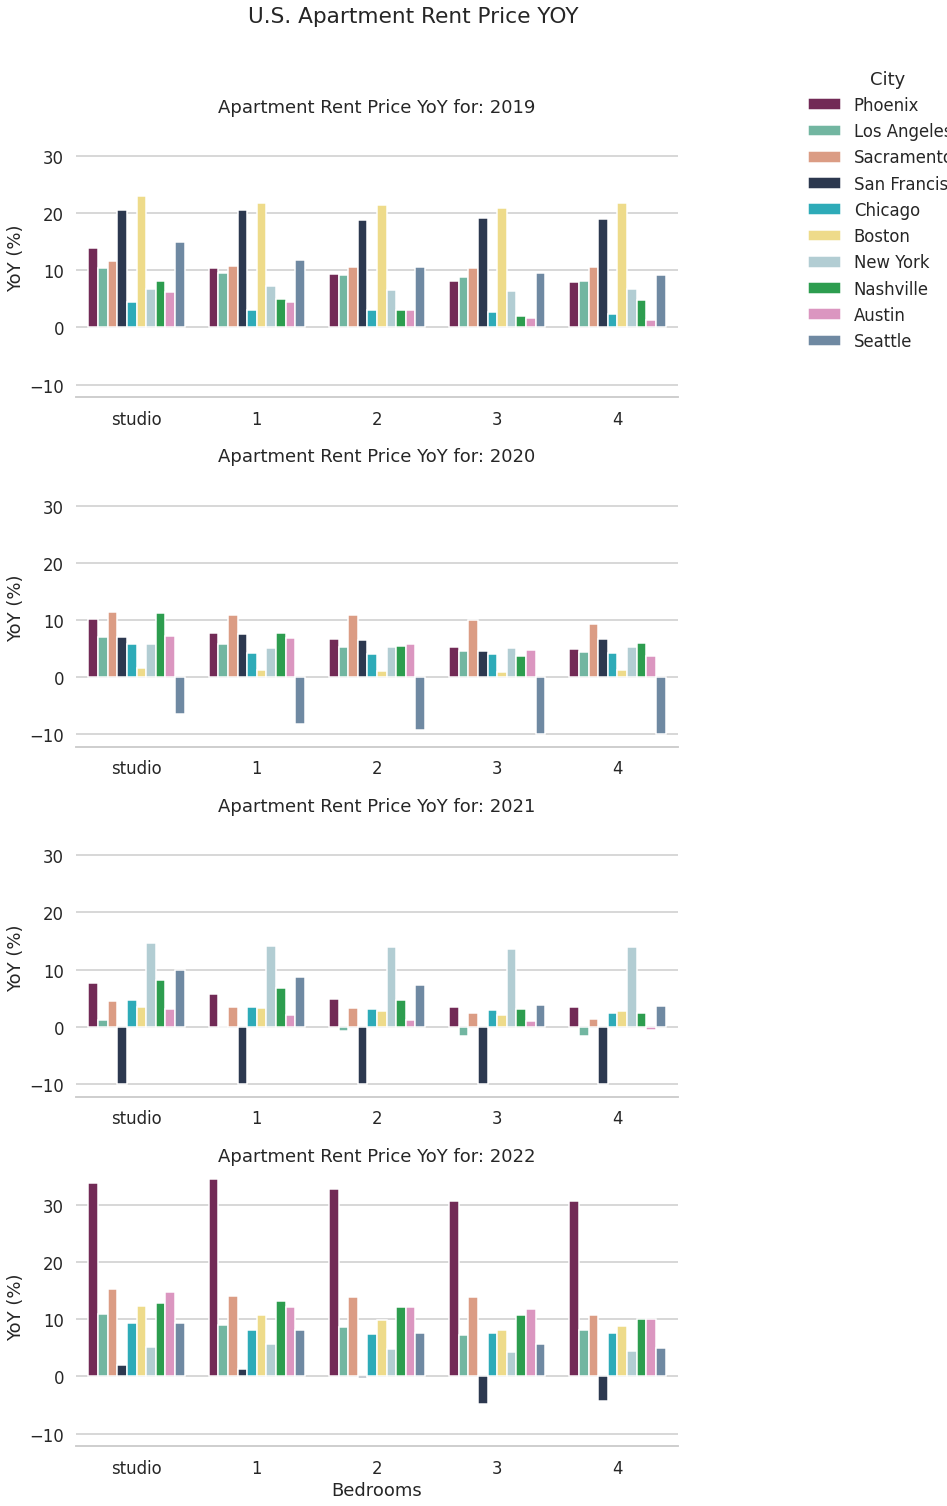

In [ ]:
colors = ["#7e1e59","#66c2a5","#ea9675","#263655","#17becf","#ffe579","#add0d8","#1ab048","#e78ac3","#668aaa"]
sns.set_palette(sns.color_palette(colors))

f = sns.catplot(data=yearly_df, x ='Bedrooms', y='YoY', kind='bar', col = 'Year', hue ='City',
            col_wrap= 1, sharex = False, height=5, aspect = 2)

f.despine(left=True)
f.fig.suptitle("U.S. Apartment Rent Price YOY", y=1.05)
f.set_titles("Apartment Rent Price YoY for: {col_name}")
f.set_axis_labels('Bedrooms','YoY (%)')
f.set_xticklabels(rotation = 'horizontal')
sns.move_legend(f, "center right",frameon=False, bbox_to_anchor = (1.1,0.9))

plt.show()

In [ ]:
# Highlight negative rent values 

def highlight_text(cell):
    if type(cell) != str and cell < 0 :
        return 'color: red'
    else:
        return 'color: black'

In [ ]:
yearly_df.columns

Index(['City', 'State', 'Bedrooms', 'Year', 'Avg Rent', 'Change', 'YoY',
       '2Y Change', 'Yo2Y', '3Y Change', 'Yo3Y', '4Y Change', 'Yo4Y'],
      dtype='object')

In [ ]:
yoy_df = yearly_df[['City', 'State', 'Bedrooms', 'Year', 'Avg Rent', 'Change', 'YoY']]
yoy_df.head()

,City,State,Bedrooms,Year,Avg Rent,Change,YoY
0,Phoenix,AZ,studio,2019,847,103,13.84
1,Los Angeles,CA,studio,2019,1279,121,10.45
2,Sacramento,CA,studio,2019,952,99,11.61
3,San Francisco,CA,studio,2019,2197,375,20.58
4,Chicago,IL,studio,2019,956,41,4.48


In [ ]:
# Highlight rent with most highest increase and decrease in price

yoy_df.style.format({"Avg Rent":"${:20,.0f}", 
                     "Change":"${:20,.0f}", 
                     "YoY":"{:,.2f}%"}).hide_index()\
                        .applymap(highlight_text)\
                        .highlight_min(subset=['Avg Rent', 'Change', 'YoY'], 
                                       color='#668aaa')\
                        .highlight_max(subset=['Avg Rent', 'Change', 'YoY'], 
                                       color='#ffe579')


City,State,Bedrooms,Year,Avg Rent,Change,YoY
Phoenix,AZ,studio,2019,$ 847,$ 103,13.84%
Los Angeles,CA,studio,2019,"$ 1,279",$ 121,10.45%
Sacramento,CA,studio,2019,$ 952,$ 99,11.61%
San Francisco,CA,studio,2019,"$ 2,197",$ 375,20.58%
Chicago,IL,studio,2019,$ 956,$ 41,4.48%
Boston,MA,studio,2019,"$ 1,715",$ 321,23.03%
New York,NY,studio,2019,"$ 1,665",$ 106,6.80%
Nashville,TN,studio,2019,$ 898,$ 68,8.19%
Austin,TX,studio,2019,$ 988,$ 57,6.12%
Seattle,WA,studio,2019,"$ 1,627",$ 211,14.90%


### **Description of Key Findings for HUD dataset**

##### Before the pandemic, from 2018 to 2019, rental price changes across bedroom types were approximately 5 - 23% for each of the top 10 cities selected for analysis; Boston had the highest price change and Chicago had the lowest price change. As the pandemic began, from 2019 to 2020 the price changes ranged from approximately –10% for Seattle, across all bedroom types,  to ~ 11% for Sacramento. As the pandemic progressed from 2020 to 2021, the price changes declined significantly for Sacramento with a 10% decline. Additionally, Los Angeles experienced the second highest rent price decrease with an ~  – 1% decline across all bedroom types which implies that it may have experienced a population decline resulting in a decrease in demand for rentals. From 2021 to 2022, Phoenix shows a dramatic ~ 30% increase in its rental price change, which suggests that there may have been a large increase in the population of residents seeking rental units which drove up the prices. In addition, San Francisco continued its decline in the 2 - 4 bedroom type category and had a very slight increase in the studio and 1 bedroom types which implies that San Francisco had a decline in its population which lead to a decrease in rental prices. 
